In [4]:
import sys
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, models
from torchvision.transforms import v2

In [5]:
# include ../../3_Datapreparation
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../3_Data_Preparation')))
from CT_Dataset import CtScanDataset

In [6]:
dataset = CtScanDataset("../../Data", df_query='BodyPart == "Stamm"', transform=None)
print(dataset[0][0].shape)
dataset[0]

(567, 512, 512)


(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [7]:
class ScaleTo01(object):
    def __call__(self, tensor):
        min_val = tensor.min()
        max_val = tensor.max()
        return (tensor - min_val) / (max_val - min_val)

In [8]:
transforms = v2.Compose([
    # change the data type to uint32 -> prevents overflow
    v2.Lambda(lambda x: x.astype(np.float32)),
    # sum up all the pixel values over an axis and project them onto a 2D plane (Axial Projection)
    v2.Lambda(lambda x: x.sum(axis=0)),
    # add color channel dimension
    v2.Lambda(lambda x: x[:, :, np.newaxis]),
    # repeat color channel 3 times (RGB)
    transforms.Lambda(lambda x: np.repeat(x, 3, axis=2)),
    # To PIL Image (required for torchvision transforms)
    v2.ToImage(),
    # Scale images to 224x224
    v2.Resize((224, 224), antialias=True),
    # Normalize tensor values to range [0, 1] with lambda function
    ScaleTo01(),
    # Normalize with mean and std
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# apply the transform to the dataset
transformed = CtScanDataset("../../Data", df_query='BodyPart == "Stamm"', transform=transforms)

In [9]:
transformed[0]

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

In [10]:
transformed[0][0]

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [11]:
transformed[0][0].shape

torch.Size([3, 224, 224])

In [12]:
torch.max(transformed[0][0])

tensor(2.6400)

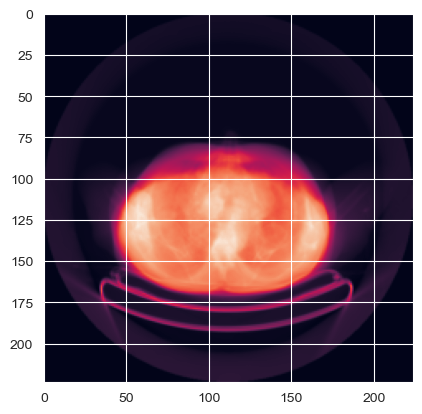

In [13]:
# plot the transformed image
import matplotlib.pyplot as plt
# scale the pixel values back to [0, 255]
plt.imshow(transformed[0][0][0,:,:])

In [14]:
type(transformed[0][1])

numpy.float32

In [15]:
type(transformed[0][0][0,0,0])

torch.Tensor

In [16]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, Dataset
from torchvision.models.resnet import ResNet18_Weights

In [17]:
# Load a pretrained ResNet model
resnet = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

# Modify the fully connected layer
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 1)  # Regression output layer

# Print the modified model (optional)
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [18]:
# train/validation split
train_set, val_set = torch.utils.data.random_split(transformed, [0.8, 0.2], generator=torch.Generator().manual_seed(42))

In [19]:
# Hyperparameters
learning_rate = 0.001
num_epochs = 20
batch_size = 32

# Loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = optim.Adam(resnet.parameters(), lr=learning_rate)

# Assuming you have your dataset ready
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_set, batch_size=batch_size, shuffle=False)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet.to(device)
print("Device:", device)

Device: cuda


In [20]:
# Initialize lists to store losses
train_losses = []
val_losses = []

# Training and validation loop
for epoch in range(num_epochs):
    resnet.train()
    running_train_loss = 0.0
    
    # Training loop
    for inputs, targets in train_loader:
        inputs, targets = inputs.float().to(device), targets.float().to(device)

        optimizer.zero_grad()

        outputs = resnet(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    # Compute the average training loss for this epoch
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validation loop (no gradients needed)
    resnet.eval()
    running_val_loss = 0.0
    
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.float().to(device), targets.float().to(device)

            outputs = resnet(inputs)
            loss = criterion(outputs.squeeze(), targets)
            running_val_loss += loss.item()

    # Compute the average validation loss for this epoch
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Print epoch summary
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

Epoch [1/20], Train Loss: 5717.1597, Val Loss: 3177.1108
Epoch [2/20], Train Loss: 4781.7801, Val Loss: 3324.2118
Epoch [3/20], Train Loss: 4107.2494, Val Loss: 1522.1721
Epoch [4/20], Train Loss: 3415.1077, Val Loss: 1860.6301
Epoch [5/20], Train Loss: 2731.6351, Val Loss: 2753.3362
Epoch [6/20], Train Loss: 2065.4125, Val Loss: 1879.7883
Epoch [7/20], Train Loss: 1460.4810, Val Loss: 1287.7274
Epoch [8/20], Train Loss: 965.1861, Val Loss: 718.8963
Epoch [9/20], Train Loss: 591.2358, Val Loss: 54.5882
Epoch [10/20], Train Loss: 345.8075, Val Loss: 97.8975
Epoch [11/20], Train Loss: 200.2958, Val Loss: 251.1788
Epoch [12/20], Train Loss: 109.7237, Val Loss: 58.6732
Epoch [13/20], Train Loss: 57.8798, Val Loss: 93.3557
Epoch [14/20], Train Loss: 42.4342, Val Loss: 229.2862
Epoch [15/20], Train Loss: 36.0690, Val Loss: 83.3616
Epoch [16/20], Train Loss: 37.8238, Val Loss: 65.1824
Epoch [17/20], Train Loss: 26.8409, Val Loss: 139.3673
Epoch [18/20], Train Loss: 23.3843, Val Loss: 63.5848


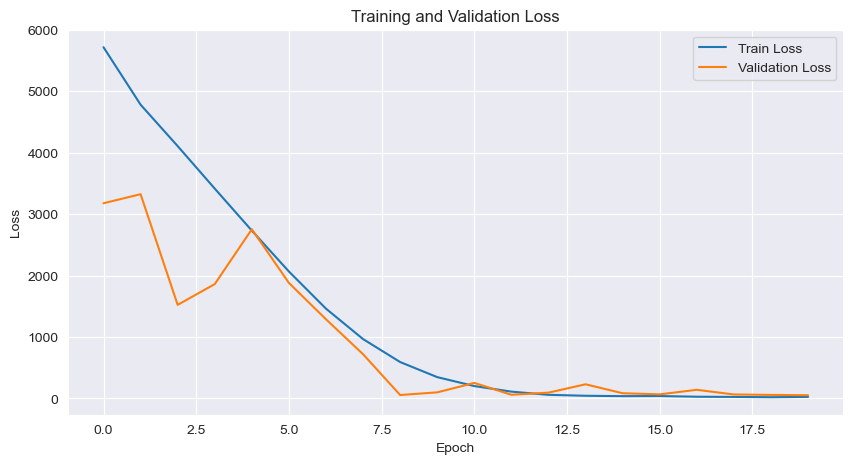

In [21]:
# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [22]:
# Save the trained model
torch.save(resnet.state_dict(), "resnet18CT_Rudimentary.pth")